In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [2]:
# Load data from sklearn
iris = datasets.load_iris()
# Select features. iris data is a 4-column matrix. Here, the last two columns are selected.
X = iris.data[:, [2,3]]
# Get labels. iris.target is a 1D array.
y = iris.target

# Split the original data
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.3, random_state=1, stratify=y)

# Feature scaling
# Create an object of 'StandardScaler' class.
sc = StandardScaler()
# Get the mean and standard deviation of the training set.
sc.fit(X_train)
# Rescale the training set
X_train_std = sc.transform(X_train)
# Rescale the testing set
X_test_std = sc.transform(X_test)
# The rescaling formular is z = (x - u) / s

In [3]:
# Define and train the model
lr = LogisticRegression(C=100, solver='lbfgs', multi_class='ovr')
# solver: the algorithm to minimize the convex loss function
# C: inversely proportional to the regularization parameter lambda
lr.fit(X_train_std, y_train)


LogisticRegression(C=100, multi_class='ovr')

Regularization term:   
$$\frac{\lambda}{2}\sum_{j=1}^{m}w_j^2$$   
According to the book, $C=1/\lambda$.

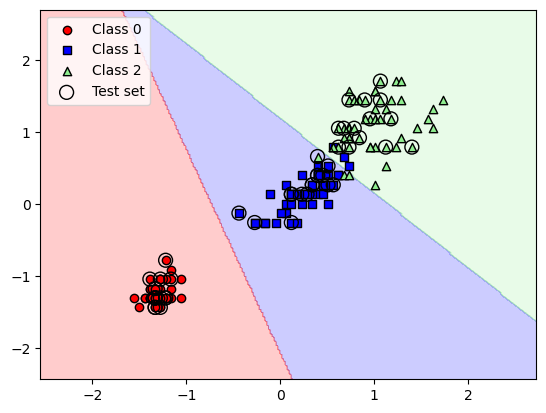

In [4]:
# Visualization
# Provide the testing data together with the original data.
def plot_decision_regions2(X, y, classifier, resolution=0.02, X_test=None):
    # Create lists of markers and colors
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    # np.unique: find the unique elements of an array
    # The output y only has two possible values, 0 and 1. Therefore np.unique(y) is 2.
    # Then colors[:len(np.unique(y))] is colors[:2], i.e., colors = ('red', 'blue')
    # This is suitable for discrete colors.
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Set the range 
    # The range of the figure is larger than the range of the features.
    # Prevent data points from lying on the edges of the figure.
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1 
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1 
    # Generate meshgrid
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    # np.ravel(): flatten an array. It returns a 1D-array
    # The input of the function 'predict' is X. Each column of X corresponds to a feature.
    # Therefore, after raveling, we need to transpose the array.
    # lab: labels for all grid points
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # The output of 'predict' is a 1D-array. It is reshaped to have the same shape as xx1
    lab = lab.reshape(xx1.shape)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    # alpha: control the transparency
    ax.contourf(xx1, xx2, lab, alpha=0.2, cmap=cmap)
    
    # Plot training examples
    # enumerate: 
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=1, c=colors[idx], marker=markers[idx], label='Class {}'.format(cl), edgecolor="black")
    
    
    # Circle testing examples
    ax.scatter(x=X_test[:,0], y=X_test[:,1], alpha=1, c='none', marker='o', label='Test set', edgecolor="black", linewidth=1, s=100)
    # s: marker size
    
    ax.legend()
        
plot_decision_regions2(sc.transform(X), y, classifier=lr, X_test=X_test_std)

In [5]:
# Predict the class probability
lr.predict_proba(X_test_std[:3, :]) # Predict the probabilities of the first three testing examples

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [6]:
# Each row include the three class probabilites for an example
# They add up to 1
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [7]:
# The prediction is the class with the highest probability
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [8]:
# Class prediction
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [9]:
# sklearn expects the input X as a 2D array
lr.predict(X_test_std[0, :].reshape(1,-1))
# lr.predict(X_test_std[0, :]) causes error.

array([2])

Text(0.5, 0, '$C\\sim1/\\lambda$')

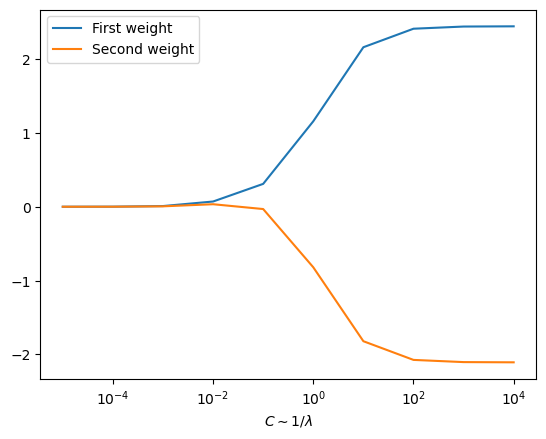

In [29]:
# Try different regularzation strength
# Recall that C~1/lambda
weights = [] # Used to store the weights of the class of label 1
c_list = [] # Used to store different values of c used in regularization
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.0**c, multi_class="ovr")
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1]) 
    # lr.coef_[1] are the two weights for class 1
    # Note that 'ovr' is used to handle multiclassification.
    # Therefore, for each class, there are a set of weights and a bias.
    c_list.append(10.0**c)

# 'weights' is a list. Each element is a numpy array.
# We convert 'weights' in to a 2d array
weights = np.array(weights)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(c_list, weights[:,0], label="First weight")
ax.plot(c_list, weights[:,1], label="Second weight")
ax.legend()
ax.set_xscale('log')
ax.set_xlabel(r'$C\sim1/\lambda$')
    


In [18]:
weights

[array([0.00036049, 0.00038003]),
 array([0.00358974, 0.00378509]),
 array([0.0344498, 0.0364006]),
 array([0.24901845, 0.26779114]),
 array([0.86772813, 0.99238849]),
 array([2.3156396 , 2.46398282]),
 array([5.57631599, 4.27609563]),
 array([10.58756396,  5.80486652]),
 array([13.93110597,  6.62393848]),
 array([14.65216005,  6.7948242 ])]